In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp, sin, cos

In [2]:
x0 = 0
x1 = 5
y0 = 1

In [3]:
# Получение функции шага 4-x четырёхшагового метода CREK
A = [
    [0,       0,        0,       0],
    [12/23,   0,        0,       0],
    [-68/375, 368/375,  0,       0],
    [31/144,  529/1152, 125/384, 0]
]

B = [
    lambda theta: 41/72 * theta**3 - 65/48 * theta**2 + theta,
    lambda theta: -529/576 * theta**3 + 529/384 * theta**2,
    lambda theta: -125/192 * theta**3 + 125/128 * theta**2,
    lambda theta: theta**3 - theta**2
]

C = [0, 12/23, 4/5, 1]


In [4]:
# Правая часть дифференциального уравнения

def f_delay(x, phi):
    return -phi

def BinarySearch(x, arr):
    mid = len(arr) // 2
    low = 0
    high = len(arr) - 1
    
    while arr[mid] != x and low <= high:
        if x > arr[mid]:
            low = mid + 1
        else:
            high = mid - 1
        mid = (low + high) // 2
    
    return mid

# Рассчёт значения из прошлого шагом плотной выдачи
def phi(x, X, Y, K, h):
    if x < x0:
        return 1
    if x in X:
        return Y[X.index(x)]

    i_xm = BinarySearch(x, X)
    
    theta = (x - X[i_xm]) / h

    return Y[i_xm] + h * sum([K[i_xm][i] * B[i](theta) for i in range(len(B))])

# Шаговая функция
def CREKStepDelay(X, Y, h, K, tau):
    b = [b(1) for b in B]
    x = X[-1]
    K1 = f_delay(x, phi(x - tau, X, Y, K, h))
    K2 = f_delay(x + C[1] * h, phi(x + C[1] * h - tau, X, Y, K, h))
    K3 = f_delay(x + C[2] * h, phi(x + C[2] * h - tau, X, Y, K, h))
    K4 = f_delay(x + C[3] * h, phi(x + C[3] * h - tau, X, Y, K, h))

    return x + h, Y[-1] + h * (b[0] * K1 + b[1] * K2 + b[2] * K3 + b[3] * K4), [K1, K2, K3, K4]


In [5]:
def RKMethodDelay(h, tau):
    x, y, k = x0, y0, []
    X = [x]
    Y = [y]
    K = k
    while X[-1] != x1:
        if X[-1] + h > x1:
            x, y, k = CREKStepDelay(X, Y, x1-X[-1],  K, tau)
        else:
            x, y, k = CREKStepDelay(X, Y, h,  K, tau)
        X.append(x)
        Y.append(y)
        K.append(k)
        
    return X, Y

In [6]:
# Точное решение 

def solution_delay(x):
    if x <= 0:
        return 1
    if x <= 1:
        return 1 - x
    if x <= 2:
        return 1 - x + (x - 1)**2 / 2
    if x <= 3:
        return 1 - x + (x - 1)**2 / 2 - (x - 2)**3 / 6
    if x <= 4:
        return 1 - x + (x - 1)**2 / 2 - (x - 2)**3 / 6 + (x - 3)**4 / 24
    if x <= 5:
        return 1 - x + (x - 1)**2 / 2 - (x - 2)**3 / 6 + (x - 3)**4 / 24 - (x - 4)**5 / 120

Err = 6.936867097248611e-05


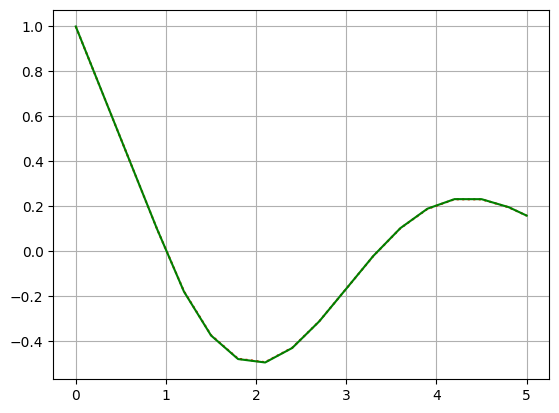

In [7]:
# Решение методдом РК
H = 0.3 
TAU = 1
x_delay, y_delay = RKMethodDelay(H, TAU)
fig, ax = plt.subplots()

trueSolDelay = [solution_delay(x) for x in x_delay]

ax.plot(x_delay, y_delay, 'r:')
ax.plot(x_delay, trueSolDelay, 'g')
ax.grid(True)

print(f'Err = {abs(y_delay[-1] - trueSolDelay[-1])}')

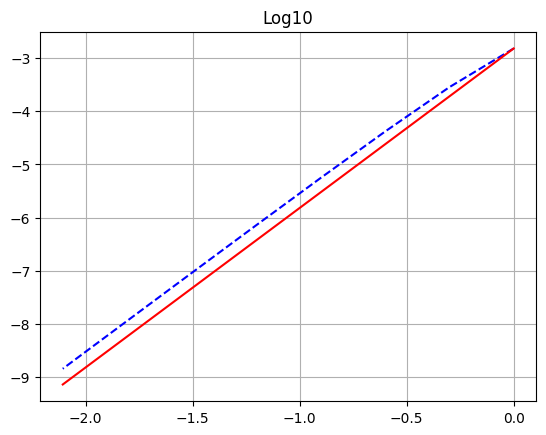

In [8]:
# График зависимости нормы точной погрешности в конце отрезка от шага h = 1/2^k, k=0,1,...,8
def graphPow2Delay():
  N = []
  H = []
  for k in range(8):
    h = 1 / (2 ** k)
    H.append(np.log10(h))
    Y = RKMethodDelay(h, TAU)[1]
    N.append(np.log10( abs(trueSolDelay[-1] - Y[-1]) ))

  y = N[0]+3*(H-H[0])

  fig, ax = plt.subplots()
  ax.set_title('Log10')
  ax.plot(H, N, color='b', linestyle='--')
  # ax.plot([-4, -1], [-6, 0], 'r')
  ax.plot(H, y, 'r')
  ax.grid(True)
  

graphPow2Delay()

In [9]:
def tau(x, y):
    pass

def RKMethodDelay2(h, tau):
    x, y, k = x0, y0, []
    X = [x]
    Y = [y]
    K = k
    while X[-1] != x1:
        if X[-1] + h > x1:
            x, y, k = CREKStepDelay(X, Y, x1-X[-1],  K, tau)
        else:
            x, y, k = CREKStepDelay(X, Y, h,  K, tau)
        X.append(x)
        Y.append(y)
        K.append(k)
        
    return X, Y